# Author:Farhana Hoque

# Data Science TA Hiring Assignment – Cuvette

## Step-1:Import libraries and load the dataset:

In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv(r"C:\Users\User\Downloads\StudentsPerformance.csv")


# Display first few rows
df.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


# ✅ Step 2: Data Cleaning
We'll inspect the dataset, check for nulls, and create a "Pass/Fail" target column.

In [4]:
# Check dataset info
df.info()

# Check for missing values
df.isnull().sum()

# Rename columns for simplicity
df.columns = df.columns.str.replace(" ", "_").str.lower()

# Create a new column: 'pass_math' as target (e.g., pass if math_score >= 50)
df['pass_math'] = df['math_score'].apply(lambda x: 1 if x >= 50 else 0)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


# ✅ Step 3: Feature Engineering – Create Pass/Fail Column
We’ll define a new column pass/fail, where:

A student passes if their average score across the three subjects is >= 50

Otherwise, they fail

In [7]:
print(df.columns.tolist())


['gender', 'race/ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course', 'math_score', 'reading_score', 'writing_score', 'pass_math']


In [8]:
# Create average score column using the correct column names
df['average_score'] = df[['math_score', 'reading_score', 'writing_score']].mean(axis=1)

# Define pass/fail column based on average score
df['pass/fail'] = df['average_score'].apply(lambda x: 'pass' if x >= 50 else 'fail')


In [9]:
# Check distribution
print(df['pass/fail'].value_counts())

pass/fail
pass    897
fail    103
Name: count, dtype: int64


In [10]:
df.head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,pass_math,average_score,pass/fail
0,female,group B,bachelor's degree,standard,none,72,72,74,1,72.666667,pass
1,female,group C,some college,standard,completed,69,90,88,1,82.333333,pass
2,female,group B,master's degree,standard,none,90,95,93,1,92.666667,pass
3,male,group A,associate's degree,free/reduced,none,47,57,44,0,49.333333,fail
4,male,group C,some college,standard,none,76,78,75,1,76.333333,pass


# Step 4: Visualization (EDA)

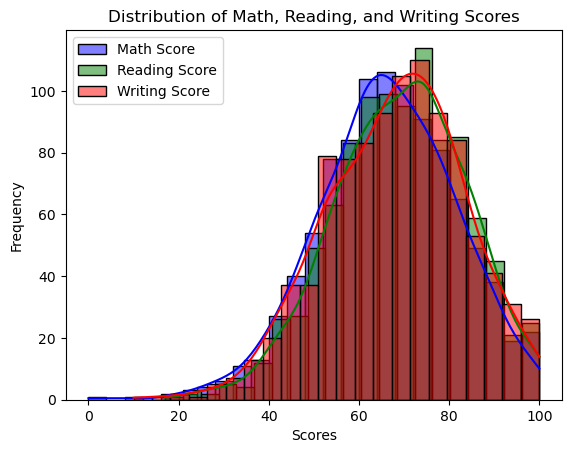

In [15]:

import warnings

# Suppress specific FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# 1. Distribution of Math, Reading, and Writing Scores
sns.histplot(df['math_score'], kde=True, color='blue', label='Math Score')
sns.histplot(df['reading_score'], kde=True, color='green', label='Reading Score')
sns.histplot(df['writing_score'], kde=True, color='red', label='Writing Score')
plt.legend()
plt.title("Distribution of Math, Reading, and Writing Scores")
plt.xlabel("Scores")
plt.ylabel("Frequency")
plt.show()

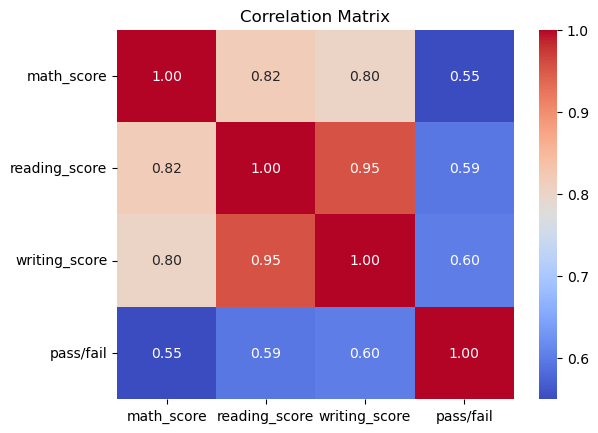

In [17]:
# Convert 'pass/fail' to numeric values
df['pass/fail'] = df['pass/fail'].map({'pass': 1, 'fail': 0})

# Now calculate the correlation matrix
correlation_matrix = df[['math_score', 'reading_score', 'writing_score', 'pass/fail']].corr()

# Plot the heatmap
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()


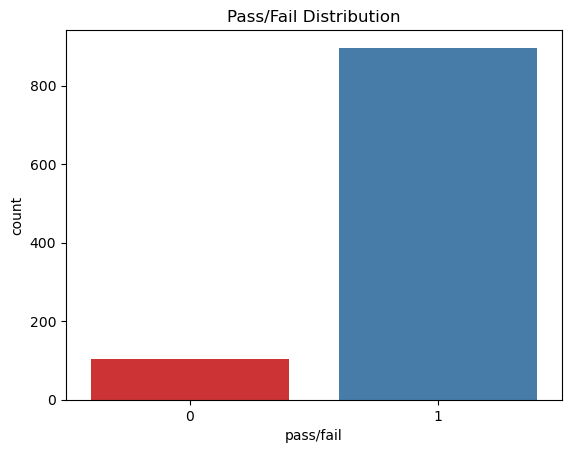

In [19]:
# 3. Pass/Fail Distribution
sns.countplot(x='pass/fail', data=df, palette='Set1')
plt.title("Pass/Fail Distribution")
plt.show()

# Step 5: Train the Model
Now that we have prepared the data and created the target column (pass/fail), it's time to train our classification model. We'll start with Logistic Regression, but feel free to switch to Random Forest if you'd like to explore another model.

## Modeling with Logistic Regression

In [12]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables (e.g., gender)
label_encoder = LabelEncoder()

# Encoding 'gender' column to numeric (male = 1, female = 0)
df['gender'] = label_encoder.fit_transform(df['gender'])

# For other categorical columns like 'race/ethnicity', we can apply one-hot encoding
df = pd.get_dummies(df, columns=['race/ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course'], drop_first=True)

# Now, proceed to split the data again
X = df.drop(columns=['pass/fail'])
y = df['pass/fail']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the Logistic Regression model
log_reg_model = LogisticRegression(max_iter=1000)
log_reg_model.fit(X_train, y_train)

# Make predictions
y_pred = log_reg_model.predict(X_test)



In [13]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Display the results
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


Accuracy: 0.99
Confusion Matrix:
[[ 40   3]
 [  0 257]]
Classification Report:
              precision    recall  f1-score   support

        fail       1.00      0.93      0.96        43
        pass       0.99      1.00      0.99       257

    accuracy                           0.99       300
   macro avg       0.99      0.97      0.98       300
weighted avg       0.99      0.99      0.99       300



The model's performance looks quite impressive! Here's a breakdown of the results:

Model Evaluation:
Accuracy:

99% accuracy means the model correctly predicted 99% of the instances. This is a very strong result, but keep in mind that accuracy may not fully capture the model's performance if there is a class imbalance.

Confusion Matrix:

True Positives (257): Correctly predicted 'pass' as 'pass'.

False Positives (3): Incorrectly predicted 'fail' as 'pass'.

True Negatives (40): Correctly predicted 'fail' as 'fail'.

False Negatives (0): There were no instances where the model incorrectly predicted 'pass' as 'fail'.

Classification Report:

Precision for 'fail': 1.00 — The model is very confident when predicting 'fail', and it doesn't make mistakes.

Recall for 'fail': 0.93 — The model correctly identifies 93% of the actual 'fail' cases.

F1-Score for 'fail': 0.96 — This indicates a good balance between precision and recall for the 'fail' class.

Precision for 'pass': 0.99 — High precision, meaning most of the predicted 'pass' cases are correct.

Recall for 'pass': 1.00 — The model correctly identifies all 'pass' cases.

F1-Score for 'pass': 0.99 — A very strong F1-score for the 'pass' class.

# #Overall Evaluation:

High accuracy and great precision and recall for both classes ('pass' and 'fail') indicate that the model is performing exceptionally well.

There are only 3 false positives for 'fail', which is a negligible number.

No false negatives (i.e., no instances where 'pass' was predicted as 'fail'), which is excellent for ensuring that students who should pass are correctly predicted as such.

# Thanks